Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Test Accuracy: 0.9314

Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       120
     Coilia dussumieri       1.00      1.00      1.00        77
Otolithoides biauritus       0.68      0.74      0.71        91
     Otolithoides pama       1.00      1.00      1.00        86
     Pethia conchonius       1.00      1.00      1.00        89
  Polynemus paradiseus       1.00      1.00      1.00       102
  Puntius lateristriga       1.00      1.00      1.00        65
        Setipinna taty       0.74      0.68      0.71       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.93       816
             macro avg       0.94      0.94      0.93       816
          weighted avg       0.93     

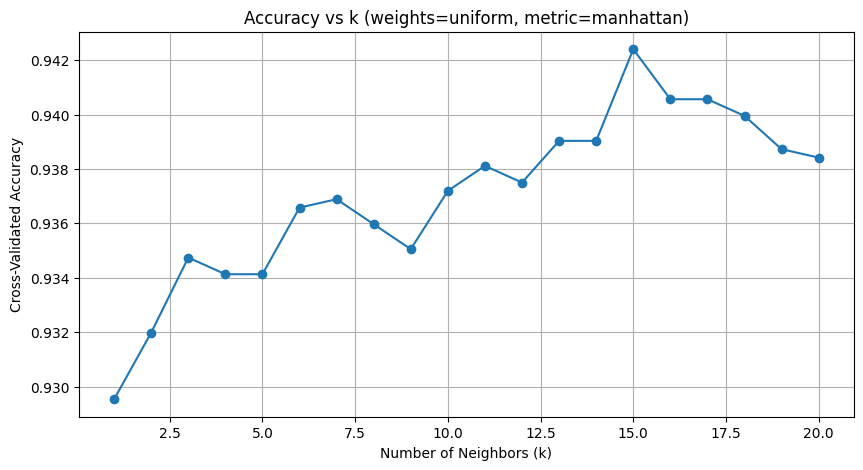

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('7.csv')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["species"])

X = data.drop("species", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

results_df = pd.DataFrame(grid_search.cv_results_)
best_weight = grid_search.best_params_['weights']
best_metric = grid_search.best_params_['metric']
subset = results_df[
    (results_df['param_weights'] == best_weight) &
    (results_df['param_metric'] == best_metric)
]

plt.figure(figsize=(10, 5))
plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title(f"Accuracy vs k (weights={best_weight}, metric={best_metric})")
plt.grid()
plt.show()